In [32]:


import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [33]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

permutation       time
0     (0, 1, 2, 3, 4)  13.826996
1     (0, 1, 2, 3, 4)  14.719000
2     (0, 1, 2, 3, 4)  15.049000
3     (0, 1, 2, 3, 4)  15.058002
4     (0, 1, 2, 3, 4)  15.136001
...               ...        ...
2395  (4, 3, 2, 1, 0)  22.977000
2396  (4, 3, 2, 1, 0)  22.993001
2397  (4, 3, 2, 1, 0)  22.964003
2398  (4, 3, 2, 1, 0)  23.052001
2399  (4, 3, 2, 1, 0)  22.938000

[2400 rows x 2 columns]

<Axes: >

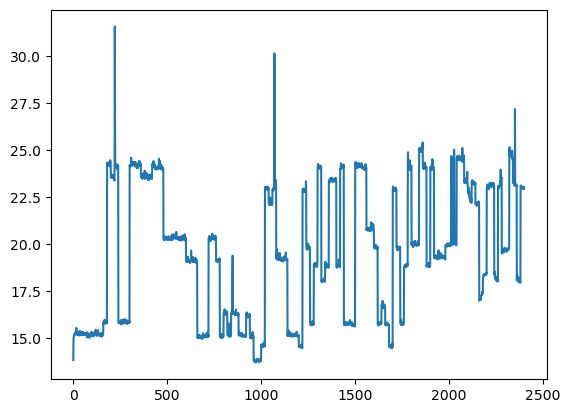

In [34]:
df.time.plot()

In [44]:
df_grouped_perm = df.groupby('permutation').mean().sort_values(by='time')
display(df_grouped_perm)

fastest_10_permutations = df_grouped_perm.head(10)
display(fastest_10_permutations)

slowest_10_permutations = df_grouped_perm.tail(10)
display(slowest_10_permutations)

fastest_30_permutations = df_grouped_perm.head(30)
slowest_30_permutations = df_grouped_perm.tail(30)

time
permutation               
(2, 0, 1, 3, 4)  13.789752
(2, 0, 1, 4, 3)  13.796209
(3, 2, 0, 1, 4)  14.551613
(2, 3, 0, 1, 4)  14.555042
(2, 0, 3, 1, 4)  14.597333
...                    ...
(4, 1, 0, 3, 2)  24.527808
(4, 1, 0, 2, 3)  24.564977
(0, 2, 4, 3, 1)  24.676228
(4, 3, 1, 0, 2)  24.756552
(3, 4, 1, 0, 2)  25.056846

[120 rows x 1 columns]

time
permutation               
(2, 0, 1, 3, 4)  13.789752
(2, 0, 1, 4, 3)  13.796209
(3, 2, 0, 1, 4)  14.551613
(2, 3, 0, 1, 4)  14.555042
(2, 0, 3, 1, 4)  14.597333
(1, 2, 3, 4, 0)  15.057650
(1, 2, 4, 0, 3)  15.079992
(1, 4, 3, 2, 0)  15.099834
(1, 3, 2, 4, 0)  15.100835
(1, 2, 4, 3, 0)  15.105928

time
permutation               
(3, 2, 4, 1, 0)  24.188350
(0, 3, 4, 2, 1)  24.208164
(0, 3, 4, 1, 2)  24.237657
(0, 3, 2, 4, 1)  24.253912
(0, 2, 3, 4, 1)  24.266008
(4, 1, 0, 3, 2)  24.527808
(4, 1, 0, 2, 3)  24.564977
(0, 2, 4, 3, 1)  24.676228
(4, 3, 1, 0, 2)  24.756552
(3, 4, 1, 0, 2)  25.056846

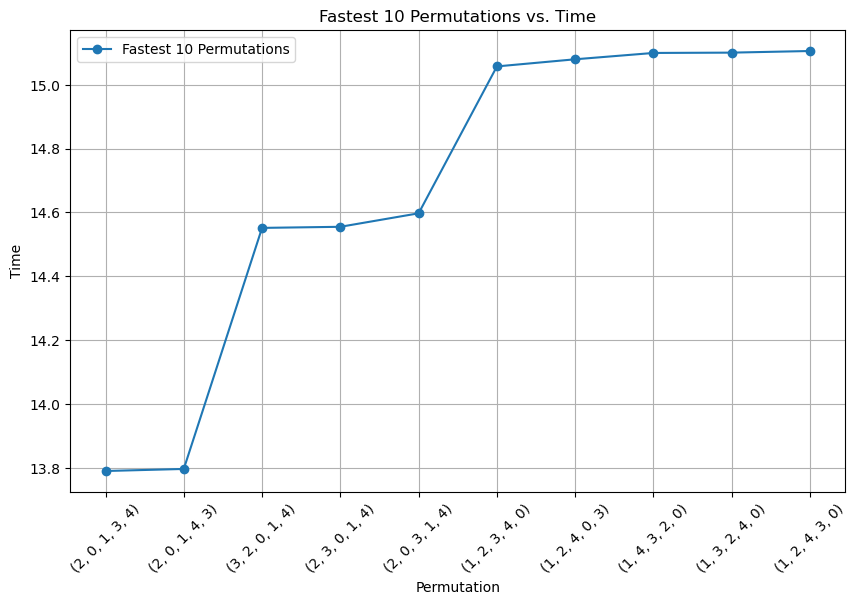

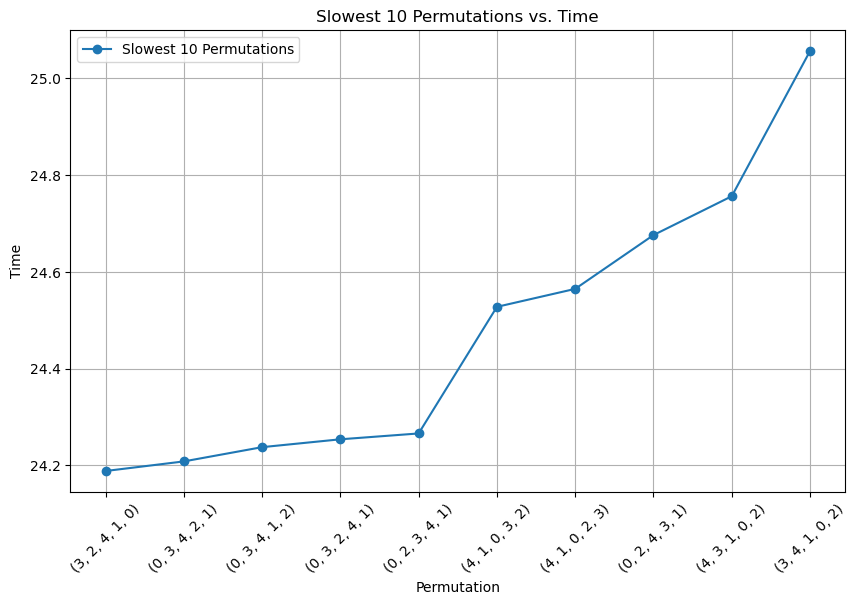

In [36]:
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(fastest_10_permutations.index, fastest_10_permutations['time'], marker='o', label='Fastest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Fastest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

# Plotting the slowest 10 permutations as a line plot
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(slowest_10_permutations.index, slowest_10_permutations['time'], marker='o', label='Slowest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Slowest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

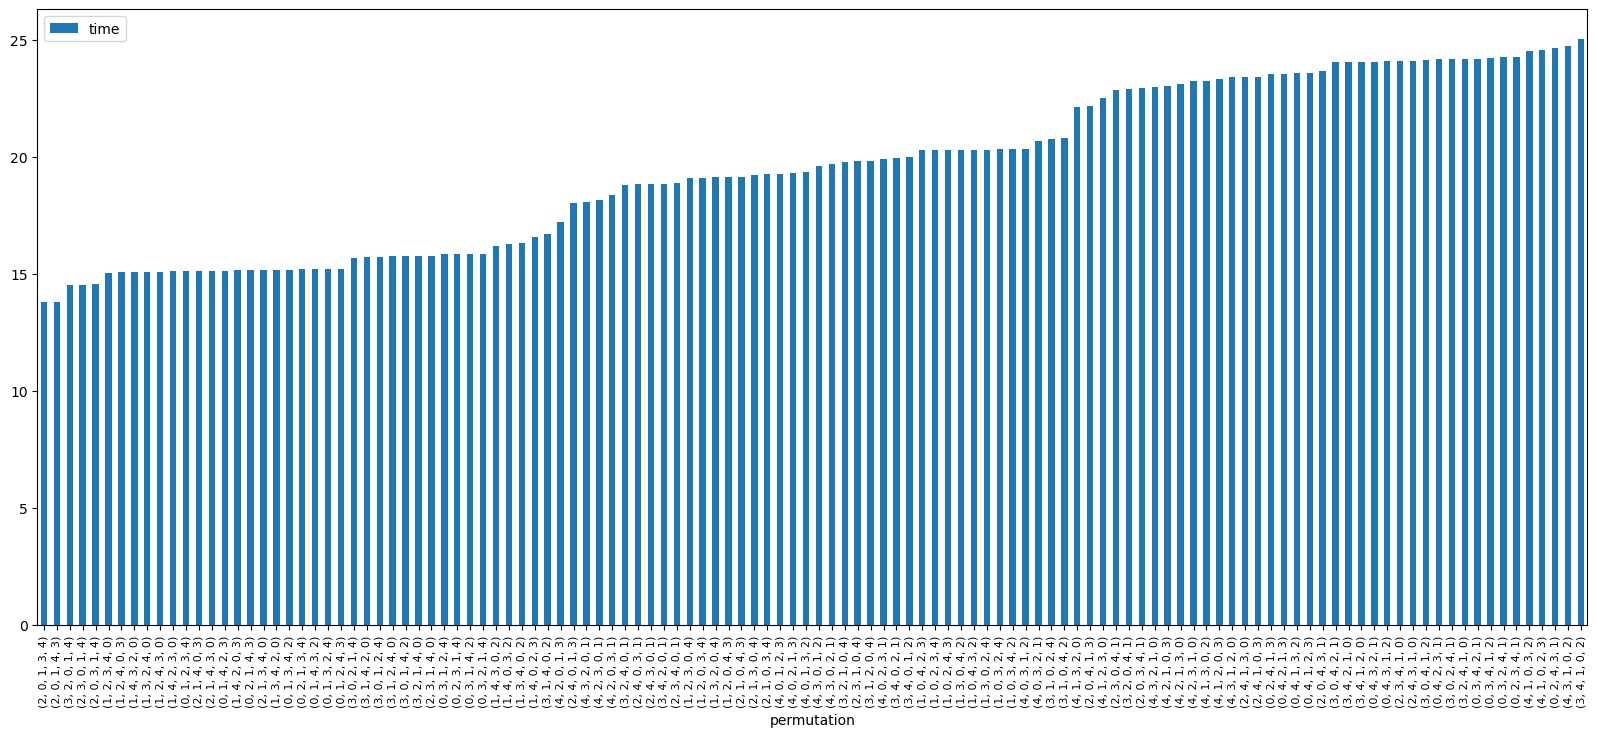

In [37]:
plotted = df_grouped_perm.plot(kind='bar', figsize=(20, 8)) 

# Rotate the x-axis labels 
plt.xticks(rotation=90, fontsize=8)

plt.show()


### Is it useful to compare the 30 slowest and fastest in an ANOVA? 

In [38]:
from scipy.stats import f_oneway


# Create lists of times 
fastest_times_values = fastest_30_permutations['time'].values.tolist()
slowest_times_values = slowest_30_permutations['time'].values.tolist()

# Perform ANOVA test
f_statistic, p_value = f_oneway(fastest_times_values, slowest_times_values)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means.")


ANOVA F-Statistic: 5361.002986128065
ANOVA p-value: 7.522498106944917e-59
Reject the null hypothesis: There is a significant difference between means.


In [ ]:
from scipy.stats import pearsonr

# Assuming you have two lists or arrays: permutation_order and reasoning_times
# permutation_order represents the order of permutations --> create list with permutations from index values
# reasoning_times contains the corresponding reasoning times --> values in dataframe 

# Perform Pearson correlation analysis
correlation_coefficient, p_value = pearsonr(permutation_order, reasoning_times)

# Print correlation coefficient and p-value
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Interpret the correlation
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant linear relationship between permutation order and reasoning times.")
else:
    print("There is no significant linear relationship between permutation order and reasoning times.")
